In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import itertools
from IPython.display import display, HTML
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
path = r'E:\Summer 2020\Nuclear Shape\Measurements' 
all_files = glob.glob(path + "/*.csv")  #creates a list of all files in path folder

listofdfs = []  #empty list to store df of csv files
for filename in all_files:   
    df = pd.read_csv(filename)
    listofdfs.append(df)  #adds each df to the list


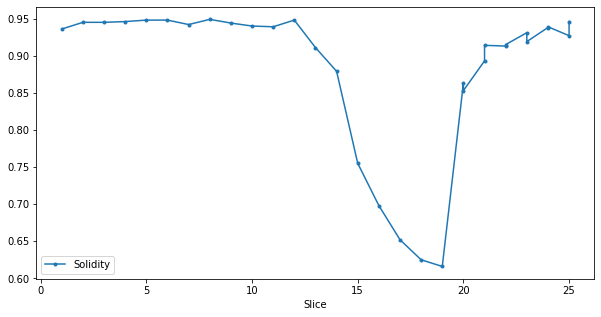

In [3]:
#test to check how to access df from the list of dfs
p1 = listofdfs[23].plot( x = 'Slice', y = 'Solidity', style='.-')

In [4]:
listofdfs[34].index

RangeIndex(start=0, stop=28, step=1)

In [5]:
#need to add column in the pivot table with filename since label is lost

l_pt = [] #list of pivot tables
for df in listofdfs:
    label = df.loc[0, 'Label'] #save the filename 
    filename = label[:label.index('.')]
    table = pd.pivot_table(df, values = ['Round','AR','Angle', 'Circ.','Major', 'Minor','Area','Solidity'], index =['Slice'])
    l_pt.append(table)


In [6]:
l_df = [] #list of usable dfs (some dfs have less than 25 points )
for df in l_pt:
    numRows = df.shape[0]
    if (numRows == 25):
        l_df.append(df)
len(l_df)        

1117

In [7]:
sl = np.arange(1,26)
time = sl * 40
for df in l_df:
    df.insert(0, 'Name', filename) #filename is retrived from previous cell haha bullshit
    df.insert(1, 'slice', sl) 
    df.index = time #setting index as ms
    df.index.name = 'Time in ms'


In [8]:
#example of dataframe after the above steps
display(l_df[500])

,Name,slice,AR,Angle,Area,Circ.,Major,Minor,Round,Solidity
Time in ms,,,,,,,,,,
40,20191030_1_1-07_Les1_OO_roi-05,1,1.1630,142.4350,391.0,0.9010,24.0600,20.6920,0.8600,0.9440
80,20191030_1_1-07_Les1_OO_roi-05,2,1.2700,138.8900,406.0,0.8730,25.6190,20.1780,0.7880,0.9440
120,20191030_1_1-07_Les1_OO_roi-05,3,1.1910,152.0280,419.0,0.8820,25.2120,21.1600,0.8390,0.9450
160,20191030_1_1-07_Les1_OO_roi-05,4,1.5460,126.6010,436.0,0.8800,29.2910,18.9520,0.6470,0.9450
200,20191030_1_1-07_Les1_OO_roi-05,5,1.8480,127.3000,445.0,0.7850,32.3600,17.5090,0.5410,0.9410
240,20191030_1_1-07_Les1_OO_roi-05,6,1.4950,133.4670,445.0,0.8300,29.1080,19.4650,0.6690,0.9420
280,20191030_1_1-07_Les1_OO_roi-05,7,1.4230,151.3420,456.0,0.7880,28.7470,20.1960,0.7030,0.9220
320,20191030_1_1-07_Les1_OO_roi-05,8,1.5730,157.6840,462.0,0.7990,30.4150,19.3410,0.6360,0.9240
360,20191030_1_1-07_Les1_OO_roi-05,9,1.7350,161.4890,500.0,0.7640,33.2310,19.1570,0.5760,0.9120


In [9]:
#Finding the difference between consequtive values
for df in l_df: 
    df['jump'] = df['Solidity'] - df['Solidity'].shift(-1)


In [10]:
l_df[64]

,Name,slice,AR,Angle,Area,Circ.,Major,Minor,Round,Solidity,jump
Time in ms,,,,,,,,,,,
40,20191030_1_1-07_Les1_OO_roi-05,1,1.0510,41.0930,337.0,0.9430,21.2330,20.2080,0.9520,0.9430,0.0000
80,20191030_1_1-07_Les1_OO_roi-05,2,1.0430,43.2340,340.0,0.9350,21.2450,20.3770,0.9590,0.9430,-0.0060
120,20191030_1_1-07_Les1_OO_roi-05,3,1.0610,73.9890,328.0,0.9580,21.0520,19.8370,0.9420,0.9490,-0.0050
160,20191030_1_1-07_Les1_OO_roi-05,4,1.1550,35.5310,335.0,0.9610,22.1990,19.2140,0.8660,0.9540,0.0240
200,20191030_1_1-07_Les1_OO_roi-05,5,1.1530,42.4270,343.0,0.8990,22.4380,19.4640,0.8670,0.9300,0.0000
240,20191030_1_1-07_Les1_OO_roi-05,6,1.1760,26.0270,344.0,0.8920,22.6930,19.3010,0.8500,0.9300,-0.0130
280,20191030_1_1-07_Les1_OO_roi-05,7,1.1910,71.9500,350.0,0.9230,23.0370,19.3450,0.8400,0.9430,-0.0020
320,20191030_1_1-07_Les1_OO_roi-05,8,1.3200,82.7660,355.0,0.9060,24.4250,18.5060,0.7580,0.9450,0.0020
360,20191030_1_1-07_Les1_OO_roi-05,9,1.7100,80.0800,391.0,0.8470,29.1770,17.0630,0.5850,0.9430,0.0140


In [14]:
#test to get the index of highest difference
max = l_df[46][['jump']].idxmin()
max['jump']

640

In [15]:
#adds the aligned time in a new column
for df in l_df:
    maxValues = df[['jump']].idxmin()
    df['aligned time'] = df.index - maxValues['jump']

In [17]:
l_df[64]

,Name,slice,AR,Angle,Area,Circ.,Major,Minor,Round,Solidity,jump,aligned time
Time in ms,,,,,,,,,,,,
40,20191030_1_1-07_Les1_OO_roi-05,1,1.0510,41.0930,337.0,0.9430,21.2330,20.2080,0.9520,0.9430,0.0000,-720
80,20191030_1_1-07_Les1_OO_roi-05,2,1.0430,43.2340,340.0,0.9350,21.2450,20.3770,0.9590,0.9430,-0.0060,-680
120,20191030_1_1-07_Les1_OO_roi-05,3,1.0610,73.9890,328.0,0.9580,21.0520,19.8370,0.9420,0.9490,-0.0050,-640
160,20191030_1_1-07_Les1_OO_roi-05,4,1.1550,35.5310,335.0,0.9610,22.1990,19.2140,0.8660,0.9540,0.0240,-600
200,20191030_1_1-07_Les1_OO_roi-05,5,1.1530,42.4270,343.0,0.8990,22.4380,19.4640,0.8670,0.9300,0.0000,-560
240,20191030_1_1-07_Les1_OO_roi-05,6,1.1760,26.0270,344.0,0.8920,22.6930,19.3010,0.8500,0.9300,-0.0130,-520
280,20191030_1_1-07_Les1_OO_roi-05,7,1.1910,71.9500,350.0,0.9230,23.0370,19.3450,0.8400,0.9430,-0.0020,-480
320,20191030_1_1-07_Les1_OO_roi-05,8,1.3200,82.7660,355.0,0.9060,24.4250,18.5060,0.7580,0.9450,0.0020,-440
360,20191030_1_1-07_Les1_OO_roi-05,9,1.7100,80.0800,391.0,0.8470,29.1770,17.0630,0.5850,0.9430,0.0140,-400


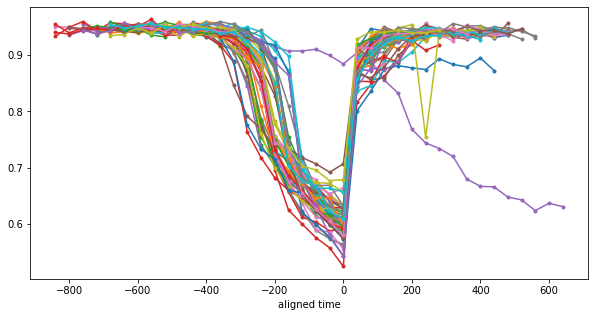

In [23]:
ax1 = l_df[1].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 1, 50): #traverses the list from 1st to 50th entry
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax1, legend=None)
    

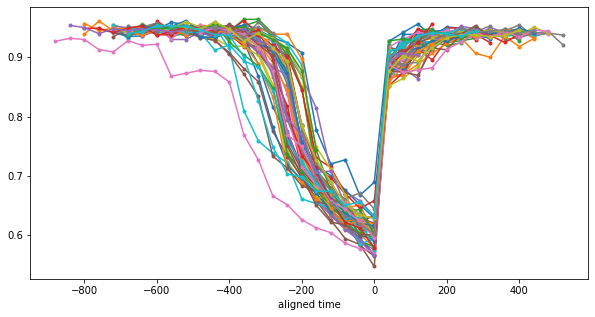

In [28]:
ax2 = l_df[50].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 51, 100):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax2, legend=None)

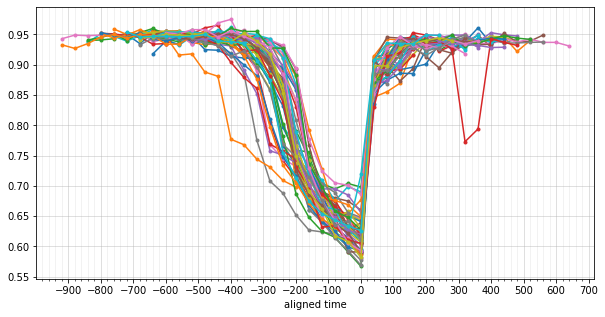

In [71]:
ax3 = l_df[100].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 101, 150):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax3, legend=None )

ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.5)

ax3.xaxis.set_major_locator(MultipleLocator(100)) #sets the major ticks itself - no need to specify endpoints
ax3.xaxis.set_minor_locator(AutoMinorLocator())

fig = ax3.get_figure()
fig.savefig(r'E:\Summer 2020\Nuclear Shape\ms_101_150.png')

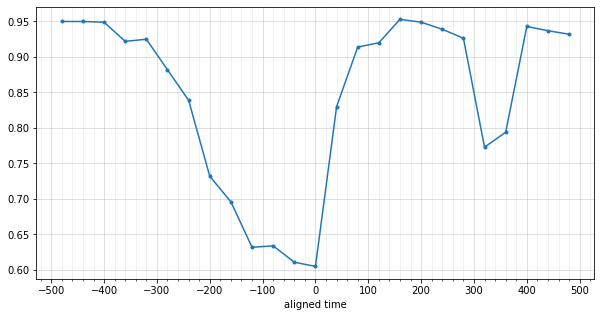

In [53]:
#highest jump is not happening at division 20191030_1_1-07_Les1_OO_roi-05
ax4 = l_df[143].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.5)

ax4.xaxis.set_major_locator(MultipleLocator(100)) #sets the major ticks itself - no need to specify endpoints
ax4.xaxis.set_minor_locator(AutoMinorLocator())

In [90]:
l_df[143]

,Name,slice,AR,Angle,Area,Circ.,Major,Minor,Round,Solidity,jump,aligned time
Time in ms,,,,,,,,,,,,
40,20191030_1_1-07_Les1_OO_roi-05,1,1.2860,98.1220,364.0,0.913,24.415,18.983,0.7780,0.9500,0.0000,-480
80,20191030_1_1-07_Les1_OO_roi-05,2,1.1190,177.0580,383.0,0.933,23.362,20.874,0.8930,0.9500,0.0010,-440
120,20191030_1_1-07_Les1_OO_roi-05,3,1.4250,161.0250,396.0,0.890,26.805,18.810,0.7020,0.9490,0.0270,-400
160,20191030_1_1-07_Les1_OO_roi-05,4,1.8320,153.6980,419.0,0.793,31.259,17.067,0.5460,0.9220,-0.0030,-360
200,20191030_1_1-07_Les1_OO_roi-05,5,2.1450,155.9750,431.0,0.741,34.305,15.997,0.4660,0.9250,0.0430,-320
240,20191030_1_1-07_Les1_OO_roi-05,6,2.6500,156.2230,427.0,0.666,37.958,14.323,0.3770,0.8820,0.0430,-280
280,20191030_1_1-07_Les1_OO_roi-05,7,2.9710,157.3050,463.0,0.599,41.849,14.087,0.3370,0.8390,0.1070,-240
320,20191030_1_1-07_Les1_OO_roi-05,8,3.5270,153.9020,449.0,0.462,44.901,12.732,0.2840,0.7320,0.0360,-200
360,20191030_1_1-07_Les1_OO_roi-05,9,4.2260,150.8520,454.0,0.434,49.424,11.696,0.2370,0.6960,0.0640,-160


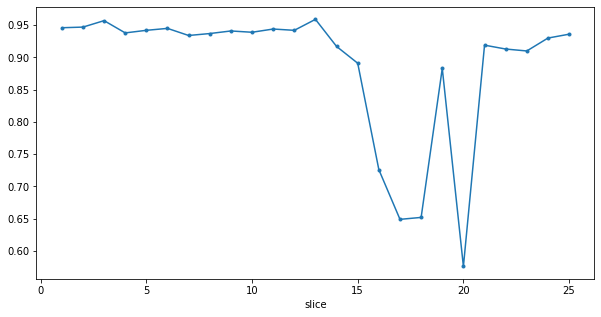

In [91]:
l_df[212].plot(x ='slice', y = 'Solidity',style='.-', legend=None)

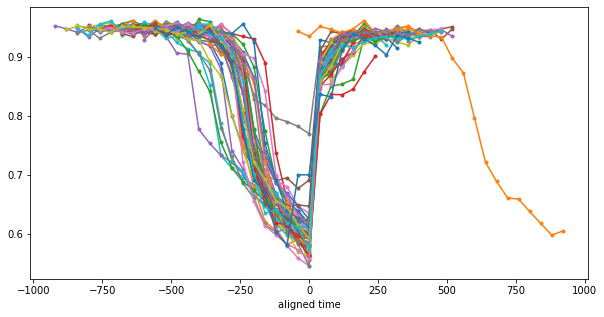

In [92]:
ax5 = l_df[150].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 150, 200):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax5, legend=None )
    

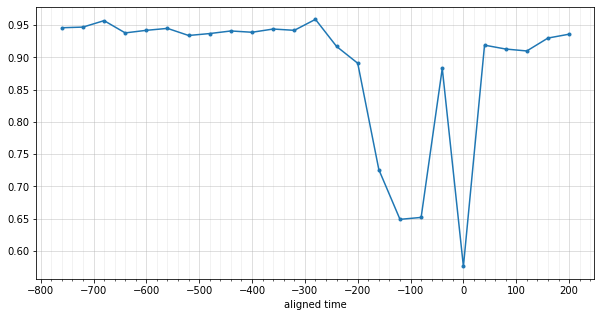

In [88]:
#highest jump is not happening at division 20191030_1_1-07_Les1_OO_roi-05
ax11 = l_df[212].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
ax11.grid(which='minor', alpha=0.2)
ax11.grid(which='major', alpha=0.5)

ax11.xaxis.set_major_locator(MultipleLocator(100)) #sets the major ticks itself - no need to specify endpoints
ax11.xaxis.set_minor_locator(AutoMinorLocator())

In [89]:
l_df[212]

,Name,slice,AR,Angle,Area,Circ.,Major,Minor,Round,Solidity,jump,aligned time
Time in ms,,,,,,,,,,,,
40,20191030_1_1-07_Les1_OO_roi-05,1,1.058,86.795,356,0.939,21.899,20.698,0.945,0.946,-0.001,-760
80,20191030_1_1-07_Les1_OO_roi-05,2,1.011,127.473,349,0.943,21.192,20.968,0.989,0.947,-0.010,-720
120,20191030_1_1-07_Les1_OO_roi-05,3,1.054,69.853,342,0.947,21.421,20.328,0.949,0.957,0.019,-680
160,20191030_1_1-07_Les1_OO_roi-05,4,1.073,78.591,348,0.918,21.805,20.321,0.932,0.938,-0.004,-640
200,20191030_1_1-07_Les1_OO_roi-05,5,1.109,64.589,344,0.939,22.036,19.876,0.902,0.942,-0.003,-600
240,20191030_1_1-07_Les1_OO_roi-05,6,1.102,82.097,350,0.939,22.161,20.109,0.907,0.945,0.011,-560
280,20191030_1_1-07_Les1_OO_roi-05,7,1.054,102.538,348,0.918,21.608,20.505,0.949,0.934,-0.003,-520
320,20191030_1_1-07_Les1_OO_roi-05,8,1.060,98.387,328,0.934,21.037,19.852,0.944,0.937,-0.004,-480
360,20191030_1_1-07_Les1_OO_roi-05,9,1.081,121.599,334,0.935,21.443,19.832,0.925,0.941,0.002,-440


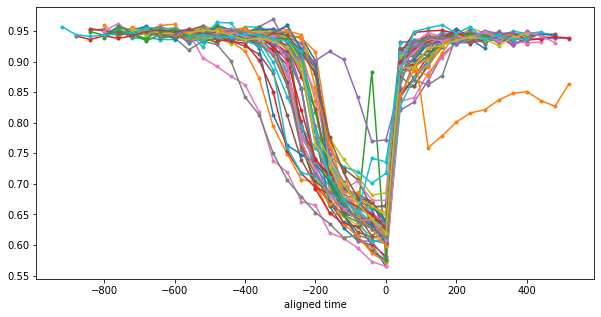

In [93]:
ax6 = l_df[200].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 201, 250):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax6, legend=None )
    

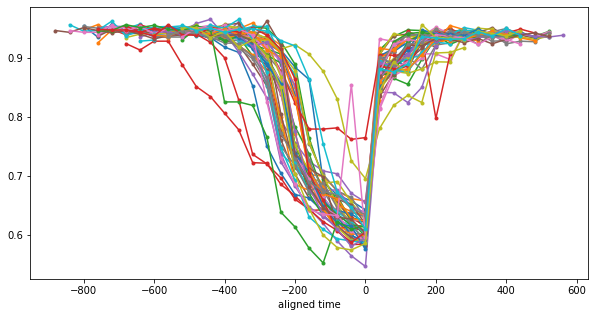

In [95]:
ax7 = l_df[250].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 251, 300):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax7, legend=None )



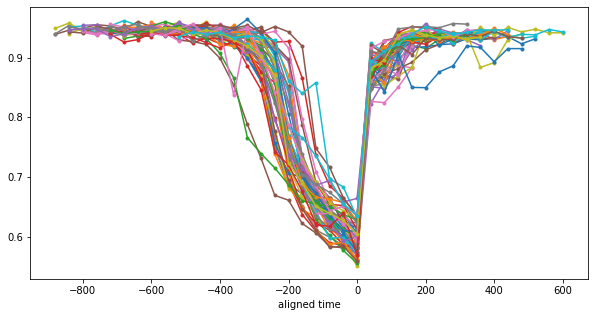

In [64]:
ax8 = l_df[300].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 301, 350):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax8, legend=None )

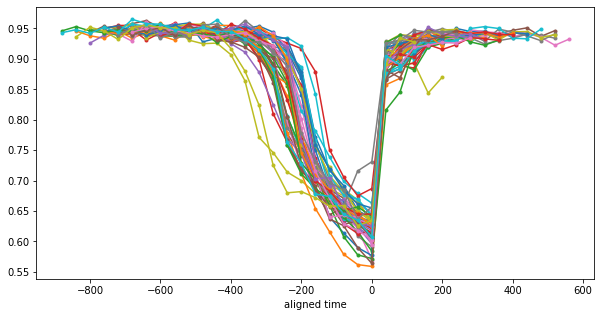

In [65]:
ax9 = l_df[350].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 351, 400):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax9, legend=None )
    

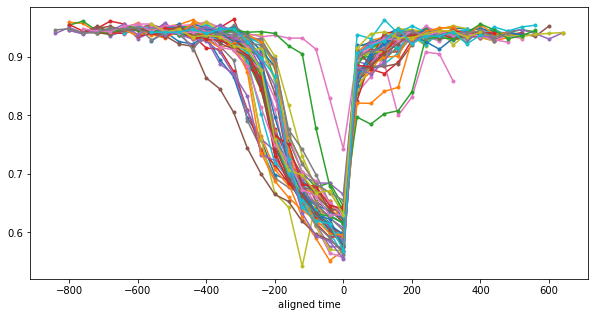

In [66]:
ax10 = l_df[400].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 401, 450):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax10, legend=None )    

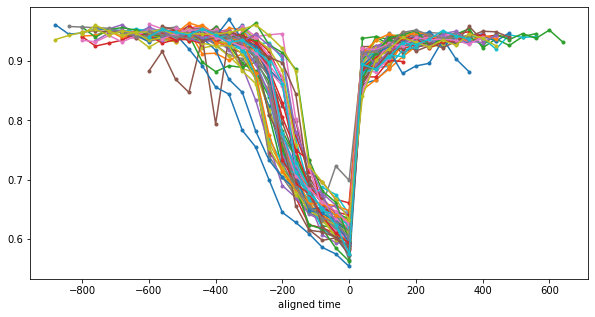

In [96]:
ax12 = l_df[450].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 451, 500):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax12, legend=None )    

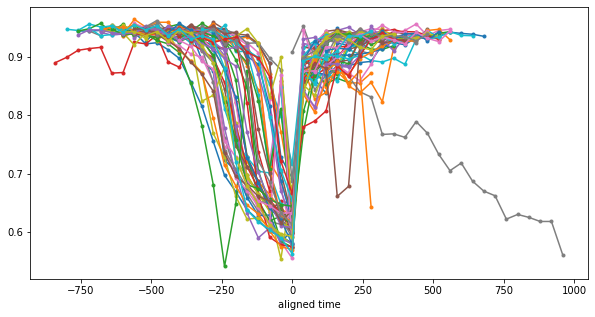

In [97]:
ax13 = l_df[500].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 501, 550):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax13, legend=None )    

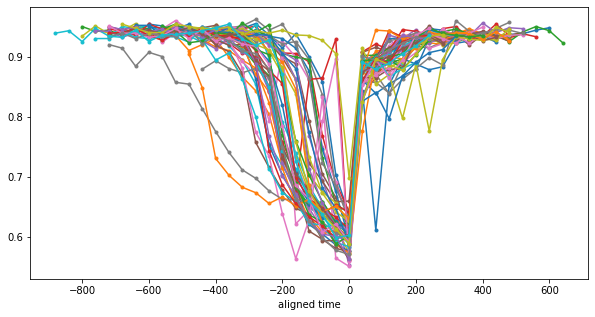

In [98]:
ax14 = l_df[550].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 551, 600):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax14, legend=None )    

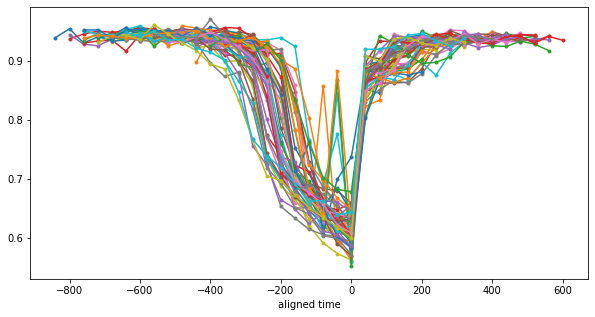

In [99]:
ax15 = l_df[600].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 601, 650):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax15, legend=None )    

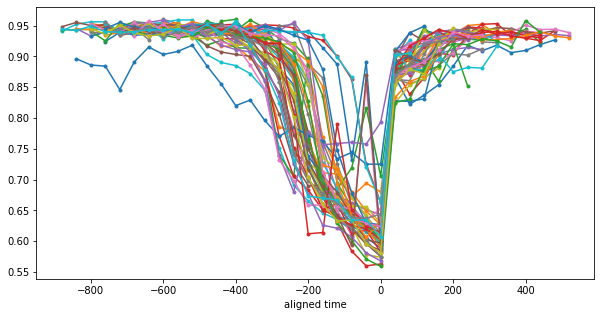

In [100]:
ax16 = l_df[650].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 651, 700):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax16, legend=None )    

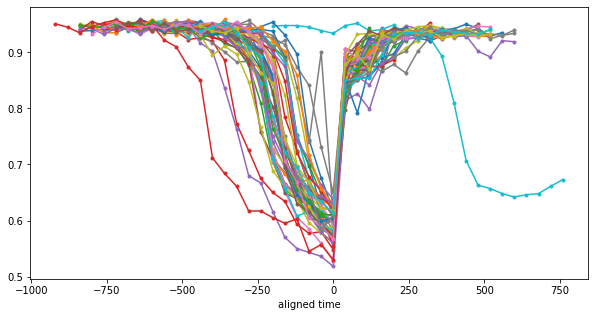

In [101]:
ax17 = l_df[700].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 701, 750):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax17, legend=None )    

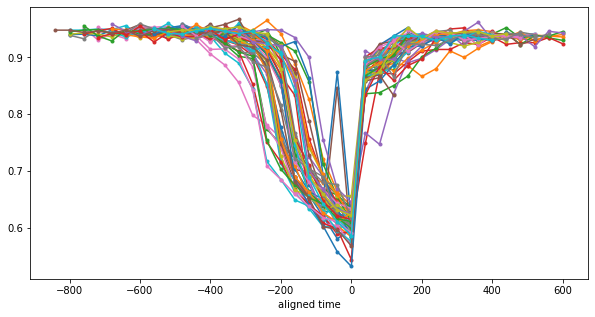

In [102]:
ax18 = l_df[750].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 751, 800):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax18, legend=None )    

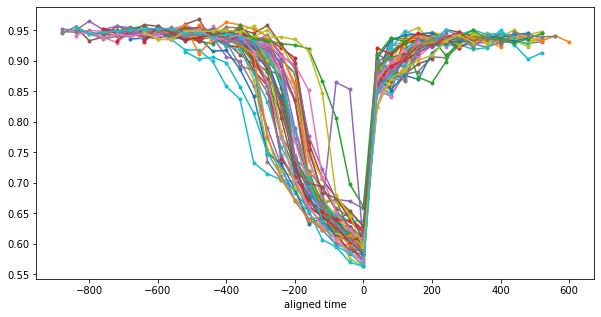

In [103]:
ax19 = l_df[800].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 801, 850):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax19, legend=None )    

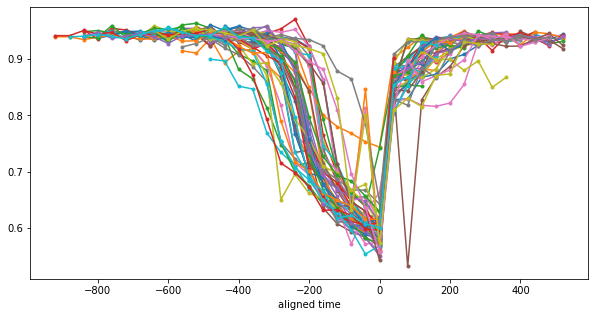

In [104]:
ax20 = l_df[850].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 851, 900):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax20, legend=None )    

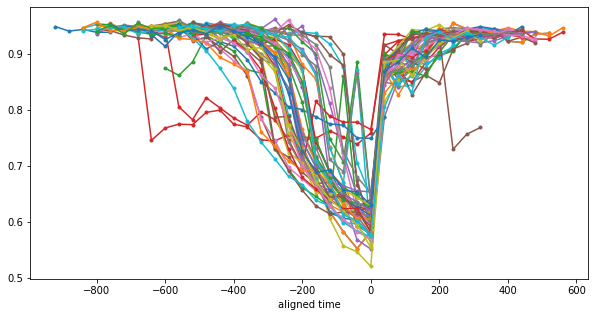

In [106]:
ax21 = l_df[900].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 900, 950):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax21, legend=None )   

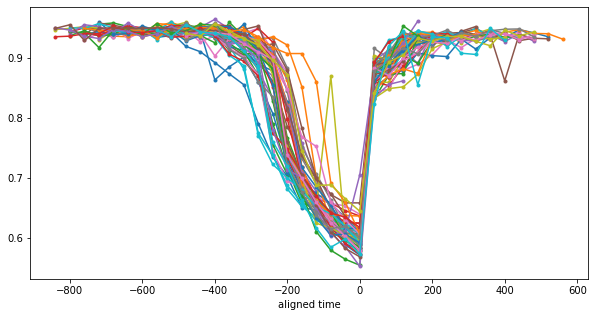

In [107]:
ax22 = l_df[950].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 951, 1000):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax22, legend=None )   

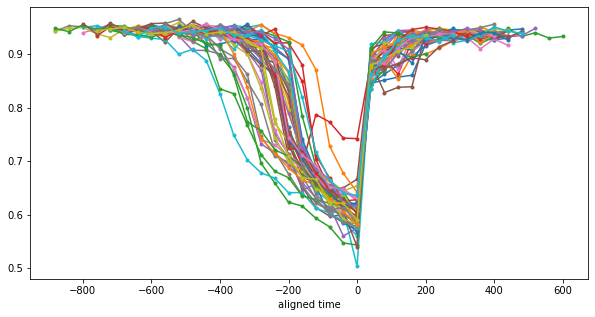

In [108]:
ax23 = l_df[1000].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 1001, 1050):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax23, legend=None )   

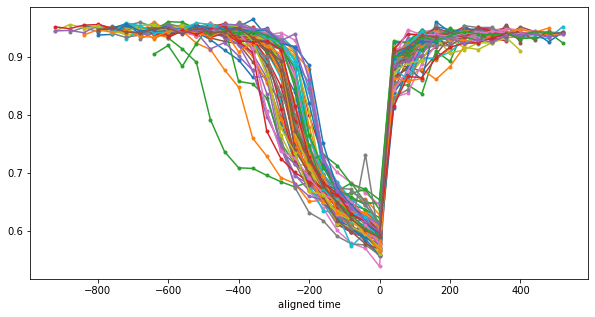

In [109]:
ax24 = l_df[1050].plot(x ='aligned time', y = 'Solidity',style='.-', legend=None)
for df in itertools.islice(l_df, 1051, 1116):
    df.plot(x ='aligned time', y = 'Solidity',style='.-', ax=ax24, legend=None )   

In [113]:
display(all_files[143]['Name'], all_files[212]['Name'])

TypeError: string indices must be integers